In [7]:
import cellbell
%pylab inline
import csv
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


In [8]:
# inputValues = np.zeros(3)
inputValues = np.zeros(12)

recIndex = 0
isRecording = False

### gestures
gestures = np.zeros(10, dtype=np.object)
newGesture = np.zeros(0)

print( shape(gestures ) )

(10,)


In [9]:
## load the functions for receiving and sending osc
%run ../python/oscserver.py

def onRecordOn( ind ):
    global recIndex, isRecording, newGesture
    recIndex = ind
    isRecording = True
    newGesture = np.zeros(0)
    print( "started recording", recIndex )
    return True

def onRecordOff():
    global isRecording, newGesture, gestures
    isRecording = False
    newGesture = newGesture.reshape( int( newGesture.shape[0]/len(inputValues)),len(inputValues))
    gestures[ recIndex ] = newGesture
    print( "stopped recording", recIndex, shape( newGesture ) )
    return True

def onAccelero(args):
    global inputValues, newGesture
#     print( args )
    inputValues = args
    if isRecording:
        newGesture = np.append( newGesture, inputValues )
    return True

def onExit():
    print( "exiting" )
    global keepRunning
    keepRunning = False
    oscserver.free()
    return True

oscserver = makeOSCServer(57120, 57402, onExit)
oscserver.onAccelero = onAccelero
oscserver.onRecordOff = onRecordOff
oscserver.onRecordOn = onRecordOn

oscserver.start()

server created
stopped recording 0 (0, 12)
started recording 0
stopped recording 0 (600, 12)
started recording 1
stopped recording 1 (600, 12)
started recording 2
stopped recording 2 (600, 12)
started recording 3
stopped recording 3 (600, 12)


Exception ignored in: 'liblo._msg_callback'
Traceback (most recent call last):
  File "src/liblo.pyx", line 55, in liblo._weakref_method.__call__
  File "/home/nescivi/git/projects/sussex/chrysalisConceptors/python/oscserver.py", line 80, in record_off_callback
    value = self.onRecordOff()
  File "<ipython-input-9-d7e941b5148d>", line 15, in onRecordOff
ValueError: cannot reshape array of size 7200 into shape (50,12)


exit
exiting


In [10]:
import dill as pickle
ts = str(datetime.datetime.timestamp(datetime.datetime.now()))
with open(r"patterns_chrysalis_" + ts + ".pickled", "wb") as output_file:
    pickle.dump(gestures, output_file, protocol=0)

In [ ]:
# gestures2 = np.zeros(3, dtype=np.object)

# g = gestures[0]
# h = np.concatenate( (g,g), axis=1 )
# gestures2[0] = h

# g = gestures[1]
# h = np.concatenate( (g,g), axis=1 )
# gestures2[1] = h

# g = gestures[2]
# h = np.concatenate( (g,g), axis=1 )
# gestures2[2] = h


In [ ]:
### not Needed

# import time

# keepRunning = True

# # create an initial state for the net
# #state = createState(net)

# while keepRunning:
#     if isRecording:
#         newGesture = np.append( newGesture, inputValues )
# #     iterateClassifier( net, state, inputValues)
# #     oscserver.send_array( "/x/CL", state['x'].flatten() )   
# #     oscserver.send_array( "/evidence", state['evidence'] ) 
# #    oscserver.send_array( "/inputvalues", inputValues )
#     time.sleep(0.05)


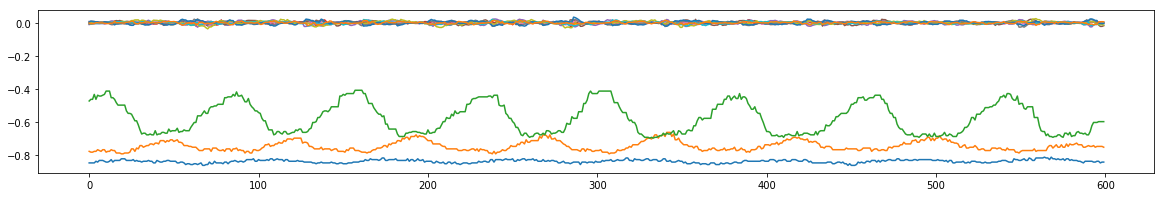

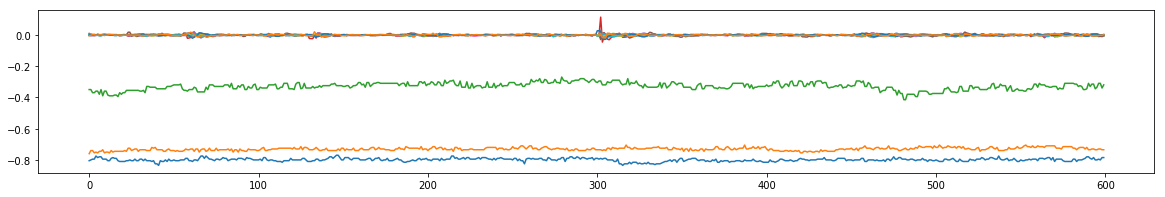

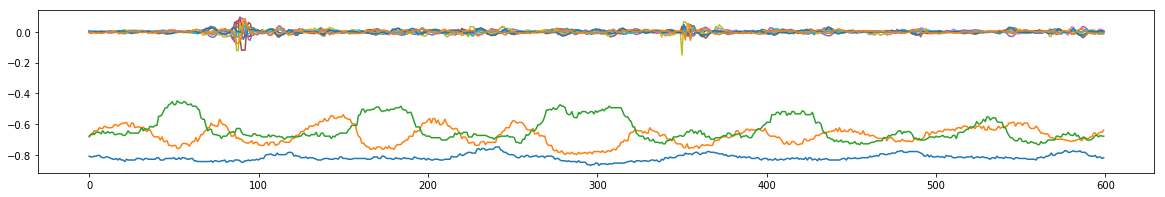

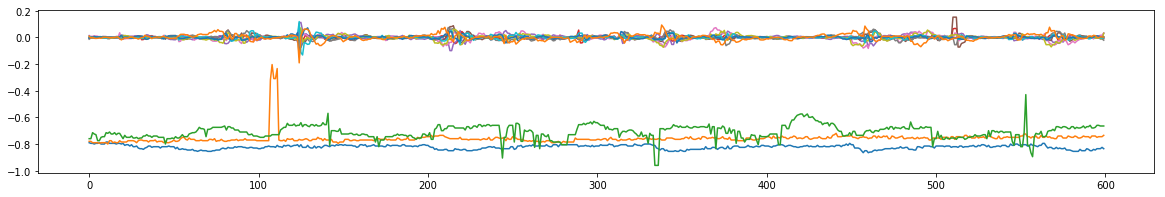

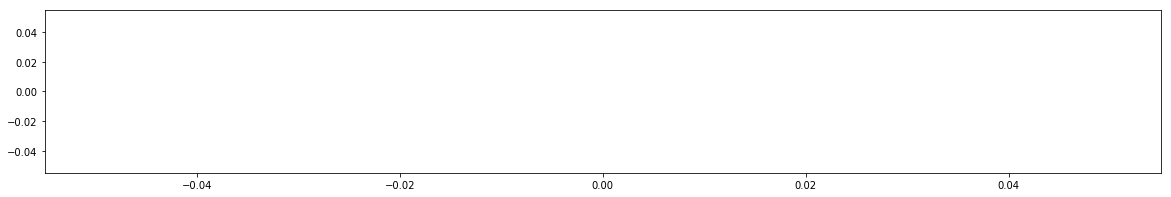

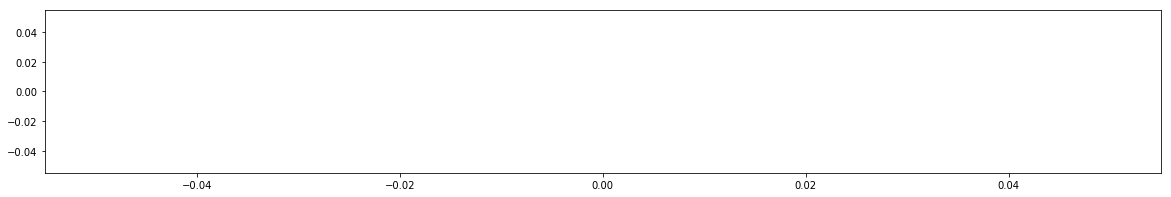

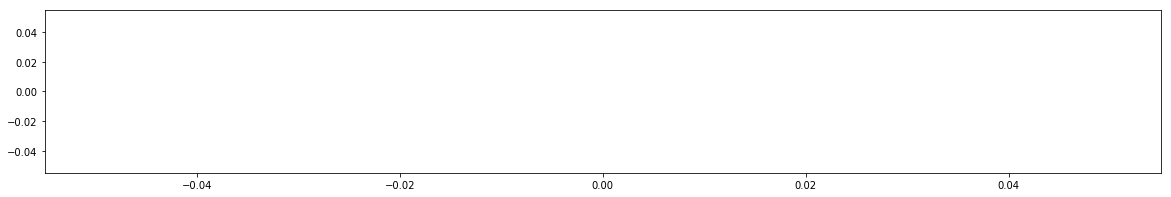

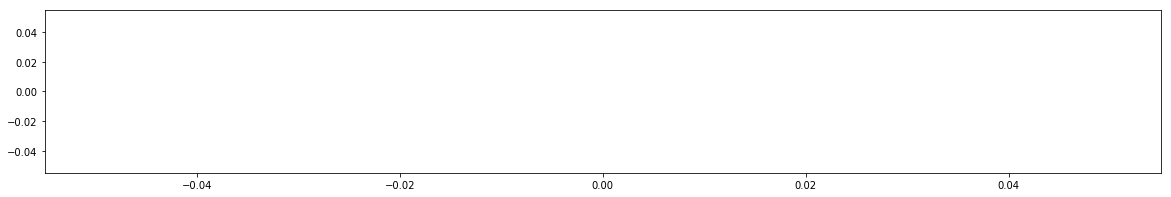

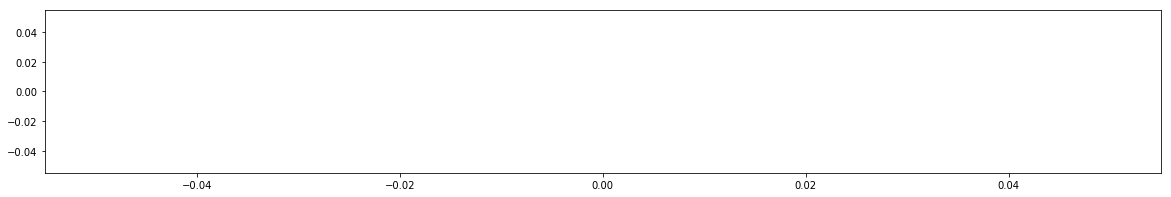

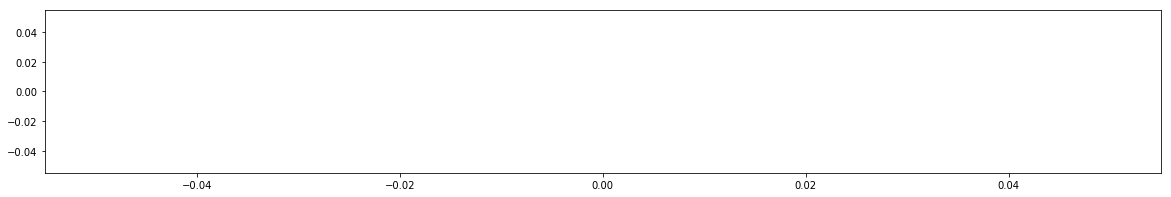

In [11]:
figsize(20,3)

for i in arange(gestures.shape[0]):
    figure(i)
    plot(gestures[i])

In [101]:

# print( "min stretch", np.min( gestures[0][:,0:3] ) )
# print( "max stretch", np.max( gestures[0][:,0:3] ) )
# print( "min acc", np.min( gestures[0][:,3:] ) )
# print( "max acc", np.max( gestures[0][:,3:] ) )

minstretch = np.min( [np.min( gestures[x][:,0:3] ) for x in arange(4)] )
maxstretch = np.max( [np.max( gestures[x][:,0:3] ) for x in arange(4)] )

minacc = np.min( [np.min( gestures[x][:,3:] ) for x in arange(4)] )
maxacc = np.max( [np.max( gestures[x][:,3:] ) for x in arange(4)] )

print( minstretch, maxstretch, minacc, maxacc )

def scale_from_to( val, inmin, inmax, outmin, outmax ):
    val = ( val - inmin )/(inmax - inmin)
    val = val * ( outmax - outmin ) + outmin
    return val

gest0s = scale_from_to( gestures[0][:,0:3], minstretch, maxstretch, -1.0, 1.0 )
gest0a = scale_from_to( gestures[0][:,3:], minacc, maxacc, -1.0, 1.0 )

# scale_from_to( 0.05, -0.2, 0.4, -1, 1 )

rescaled_stretch = [scale_from_to( gestures[x][:,0:3],  minstretch, maxstretch, -1.0, 1.0  ) for x in arange(4)]
rescaled_acc = [scale_from_to( gestures[x][:,3:],  minacc, maxacc, -1.0, 1.0  ) for x in arange(4)]

rescaled_gestures = np.zeros(10, dtype=np.object)

rescaled_gests = [ np.concatenate( 
    ( scale_from_to( gestures[x][:,0:3],  minstretch, maxstretch, -1.0, 1.0  ),
    scale_from_to( gestures[x][:,3:],  minacc, maxacc, -1.0, 1.0  ) ), axis = 1 ) for x in arange(4) ]


rescaled_gestures[0] = rescaled_gests[0]
rescaled_gestures[1] = rescaled_gests[1]
rescaled_gestures[2] = rescaled_gests[2]
rescaled_gestures[3] = rescaled_gests[3]

rescaled_gestures


-0.961049795151 -0.204100444913 -0.191246569157 0.152068734169


array([ array([[-0.70860875, -0.5231785 ,  0.28476826, ...,  0.09156883,
         0.13688578,  0.10393889],
       [-0.70860875, -0.53642358,  0.31125827, ...,  0.06282341,
         0.17387617,  0.07662927],
       [-0.70860875, -0.53642358,  0.31125827, ...,  0.07725254,
         0.1596085 ,  0.08392804],
       ..., 
       [-0.70860875, -0.44370846, -0.04635794, ...,  0.08577704,
         0.09854815,  0.14836346],
       [-0.69536382, -0.44370846, -0.04635794, ...,  0.10503613,
         0.08360164,  0.15323857],
       [-0.69536382, -0.45695354, -0.04635794, ...,  0.11144252,
         0.08936913,  0.14623842]]),
       array([[-0.58940361, -0.47019847,  0.61589366, ...,  0.13324855,
         0.10605525,  0.08551835],
       [-0.57615868, -0.41721844,  0.61589366, ...,  0.15765533,
         0.12257124,  0.10469932],
       [-0.5629136 , -0.41721844,  0.56291363, ...,  0.12581436,
         0.10574795,  0.12668938],
       ..., 
       [-0.57615868, -0.39072843,  0.72185379, ...,  0.12

In [102]:
np.array(rescaled_gestures).shape

(10,)

In [85]:
print( type( gestures[0]) )
print( type( rescaled_gestures[0] ))
rescaled_gestures[0]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[-0.70860875, -0.5231785 ,  0.28476826, ...,  0.09156883,
         0.13688578,  0.10393889],
       [-0.70860875, -0.53642358,  0.31125827, ...,  0.06282341,
         0.17387617,  0.07662927],
       [-0.70860875, -0.53642358,  0.31125827, ...,  0.07725254,
         0.1596085 ,  0.08392804],
       ..., 
       [-0.70860875, -0.44370846, -0.04635794, ...,  0.08577704,
         0.09854815,  0.14836346],
       [-0.69536382, -0.44370846, -0.04635794, ...,  0.10503613,
         0.08360164,  0.15323857],
       [-0.69536382, -0.45695354, -0.04635794, ...,  0.11144252,
         0.08936913,  0.14623842]])

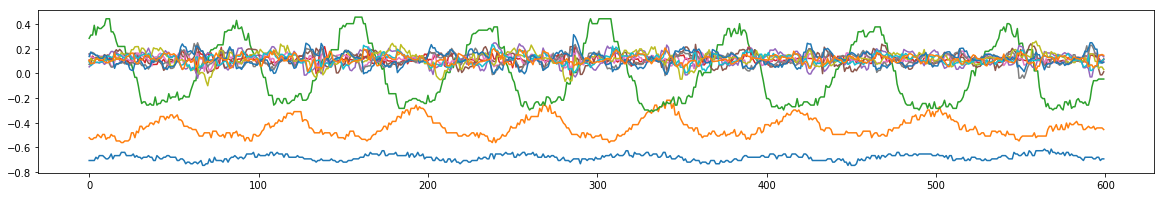

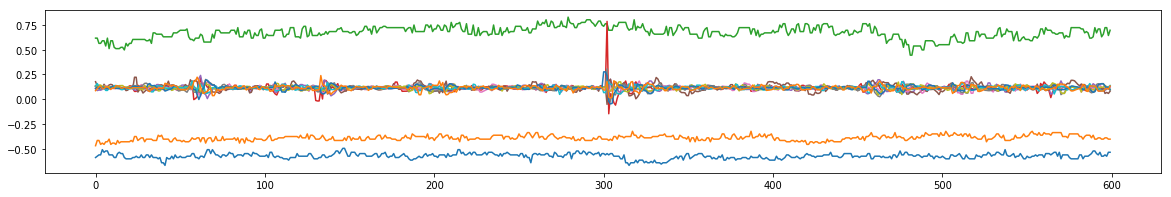

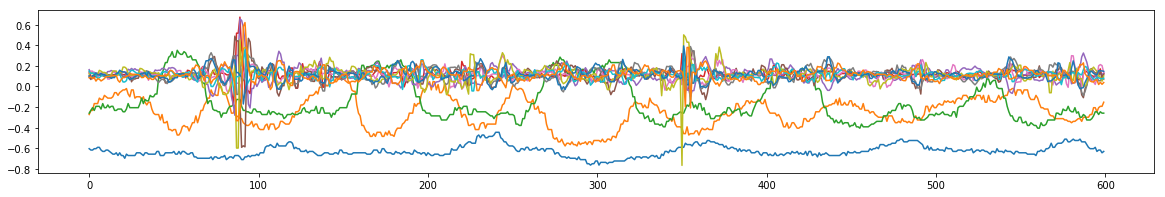

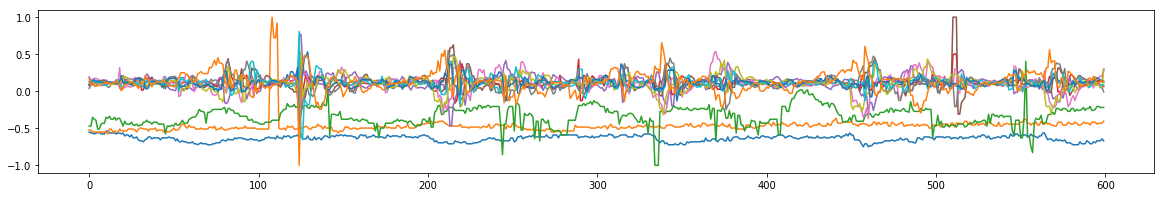

In [103]:
figsize(20,3)

for i in arange(4):
    figure(i)
#     plot(rescaled_stretch[i])
#     plot(rescaled_acc[i])
    plot(rescaled_gestures[i])

In [104]:
# import dill as pickle
# ts = str(datetime.datetime.timestamp(datetime.datetime.now()))
with open(r"patterns_chrysalis_rescaled" + ts + ".pickled", "wb") as output_file:
    pickle.dump(rescaled_gestures, output_file, protocol=0)

In [105]:
def generateInternalWeights(nInternalUnits, connectivity):
    success = False
    internalWeights = 0
    while success == False:
        try:
            internalWeights = np.random.randn(nInternalUnits,nInternalUnits) * (np.random.random((nInternalUnits,nInternalUnits)) < connectivity)
            specRad = abs(np.linalg.eig(internalWeights)[0][0])
            if (specRad > 0):
                internalWeights = internalWeights / specRad
                success = True
        except e:
            print(e)
    return internalWeights

In [117]:

def makeClassifierNetwork(p):
    Netconnectivity = 1
    if p['N'] > 20:
        Netconnectivity = 10.0/p['N'];
    WstarRaw = generateInternalWeights(p['N'], Netconnectivity)
    WinRaw = 2 * (np.random.rand(p['N'], p['Nin']) - 0.5) *  (np.random.random((p['N'],  p['Nin'])) < p['connIn'])
    WbiasRaw = 2 * (np.random.rand(p['N'], 1) - 0.5)

    #Scale raw weights     
    Wstar = p['NetSR'] * WstarRaw;
    W = Wstar
    Win = p['NetinpScaling'] * WinRaw;
    Wbias = p['BiasScaling'] * WbiasRaw;  
    I = np.eye(p['N'])
    xCollector = np.zeros((p['N'], p['learnLength']))
    pCollector = np.zeros(( p['Nin'], p['learnLength']))
    x = np.zeros((p['N'],1))
    
    allTrainxArgs = np.zeros((p['N'] + 1, 0));
#     allTrainOldxArgs = np.zeros((p['N'], 0));
#     allTrainWtargets = np.zeros((p['N'], 0));
#     allTrainOuts = np.zeros(( p['Nin'], 0));
    patternRs =  np.zeros((1, p['patts'].size), dtype=np.object)
    
    for i_pattern in range(p['patts'].size):
        print('Observing pattern ', i_pattern)
        patt = p['patts'][i_pattern]
        xCollector = np.zeros((p['N'] + 1, p['learnLength']));
#         xOldCollector = np.zeros((p['N'], p['learnLength']));
#         WTargetCollector = np.zeros((p['N'], p['learnLength']));
#         pCollector = np.zeros(( p['Nin'], p['learnLength']));
        x = np.zeros((p['N'], 1));

        for n in range(p['washoutLength'] + p['learnLength']):
            u = patt.take(n, mode='wrap', axis=0)
            xOld = x
            Wtarget = (Wstar.dot(x)) + vstack(Win.dot(u))
            x = ((1.0-p['LR']) * xOld) + (p['LR'] * tanh(Wtarget + Wbias))
            if n >= p['washoutLength']:
                xCollector[:, n - p['washoutLength']] = np.concatenate((x[:,0], np.array([1])))
#                 xOldCollector[:, n - p['washoutLength']] = xOld[:,0]
#                 WTargetCollector[:, n - p['washoutLength']] = Wtarget[:,0]
#                 pCollector[:, n - p['washoutLength']] = u
#             uOld = u
        
        R = xCollector[0:-1].dot(xCollector[0:-1].T) / p['learnLength']
        patternRs[0,i_pattern] = R
        allTrainxArgs = np.concatenate((allTrainxArgs, xCollector), axis=1)
#         allTrainOldxArgs = np.concatenate((allTrainOldxArgs, xOldCollector), axis=1)
#         allTrainOuts = np.concatenate((allTrainOuts, pCollector), axis=1)
#         allTrainWtargets = np.concatenate((allTrainWtargets, WTargetCollector), axis=1)
        print("Done")

    return locals()

params = {'N':500, 'NetSR':1.5, 'NetinpScaling':1.3,'BiasScaling':0.9,
         'washoutLength':200, 'learnLength':1200, 
          'LR': 0.2, 'connIn': 0.2, 'Nin': 12,
          'patts':rescaled_gestures[[0,1,2,3]]
#           'patts':gestures[[0,1,2,3]]
         }

net = makeClassifierNetwork(params)
print("Done")
cellbell.ding()


Observing pattern  0
Done
Observing pattern  1
Done
Observing pattern  2
Done
Observing pattern  3
Done
Done


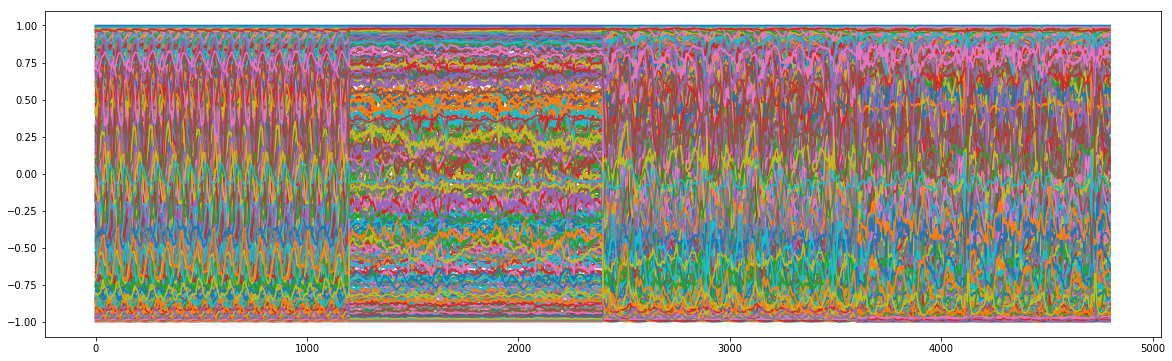

In [118]:
figsize(20,6)
plot(net['allTrainxArgs'].T[:])
None
cellbell.ding()

In [119]:
def computeConceptor(p, net, i_pattern, alpha):
#     print('Computing conceptor, alpha: ', alpha)
    Cs = np.zeros((4, 1), dtype=np.object)
    R = net['patternRs'][0,i_pattern]
    [U,s,V] = svd(R)
    S = diag(s)
    Snew = (S * linalg.inv(S + pow(alpha, -2) * np.eye(p['N'])))

    C =  U.dot(Snew).dot(U.conj().T);
    Cs[0,0] = C
    Cs[1,0] = U
    Cs[2,0] = diag(Snew)
    Cs[3,0] = diag(S)

    return Cs

def testConceptor(net, cNet, recallTestLength):
    trials = 1
    attens = np.zeros(trials)
    p = net['p']
    C = cNet[0,0]
    for i_trial in range(trials):
        x_CTestPL = np.zeros((p['N'], recallTestLength))
        z_CTestPL = np.zeros((p['N'], recallTestLength))
#         p_CTestPL = np.zeros((1, recallTestLength))
        x = 0.5 * np.random.randn(p['N'],1)
        z = x
        for n in range(recallTestLength + p['washoutLength']):
            xOld = x
            Wtarget = (net['W'].dot(x))
            z = ((1.0-p['LR']) * xOld) + (p['LR'] * tanh(Wtarget + net['Wbias']))
            x = C.dot(z)
            xPrev = x
            if (n > p['washoutLength']):
                x_CTestPL[:,n-p['washoutLength']] = x.T
                z_CTestPL[:,n-p['washoutLength']] = z.T
#                 p_CTestPL[:,n-p['washoutLength']] = cNet['net']['Wout'].dot(np.concatenate((x[:,0], np.array([1]))))

#         attenuation = np.mean(pow(np.sum(z_CTestPL[:,:] - x_CTestPL[:,:], axis=1),2)) / np.mean(pow(np.sum(z_CTestPL[:,:], axis=1),2))
        attenuation = np.mean(pow(np.linalg.norm(z_CTestPL[:,:] - x_CTestPL[:,:], axis=1),2)) / np.mean(pow(np.linalg.norm(z_CTestPL[:,:], axis=1),2))
        attens[i_trial] = attenuation
        
    return np.mean(attens)

def fitnessf(aperture, *args):
    print('Pattern: ', args[0])
    cnet = computeConceptor(net['p'], net, args[0], aperture)
    atten = testConceptor(net, cnet, 300)
    return atten

In [128]:
import scipy.optimize
apertures = [sp.optimize.fminbound(fitnessf, 0, 500,  disp=3, xtol=1, args = (x,)) 
             for x in np.arange(net['p']['patts'].shape[0])]

#store conceptors with calculated apertures
patternCs = np.zeros(len(apertures), dtype=np.object)
for i_patt in range(patternCs.size):
    patternCs[i_patt] = computeConceptor(net['p'], net, i_patt, apertures[i_patt])
cellbell.ding()

Pattern:  0
 
 Func-count     x          f(x)          Procedure
    1        190.983    0.0013545        initial
Pattern:  0
    2        309.017   0.00127428        golden
Pattern:  0
    3        381.966   0.00123264        golden
Pattern:  0
    4        427.051   0.00121025        golden
Pattern:  0
    5        454.915   0.00119745        golden
Pattern:  0
    6        472.136    0.0011899        golden
Pattern:  0
    7        482.779   0.00118537        golden
Pattern:  0
    8        489.357   0.00118261        golden
Pattern:  0
    9        493.422   0.00118092        golden
Pattern:  0
   10        495.935   0.00117988        golden
Pattern:  0
   11        497.488   0.00117925        golden
Pattern:  0
   12        498.447   0.00117885        golden
Pattern:  0
   13         499.04   0.00117861        golden
Pattern:  0
   14        499.407   0.00117846        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =

In [129]:
apertures

[499.40687935517889,
 282.67757285398199,
 499.51559167459084,
 499.40687935517889]

In [130]:
import scipy.spatial.distance as dist


def plotConceptorPatterns(net, cNet, recallTestLength):
    #calc negative evidence
    def conceptorOr(C,B):
        I = np.eye(C.shape[0])
        return linalg.inv(I + linalg.inv(C.dot(linalg.inv(1.0-C)) + B.dot(linalg.inv(1.0-B))))
    patternCsNeg = np.zeros(len(apertures), dtype=np.object)

    for i_c in arange(net['p']['patts'].size):
        idxs = np.delete(arange(net['p']['patts'].size), i_c)
        Cneg = conceptorOr(patternCs[idxs[0]][0,0], patternCs[idxs[1]][0,0])
        for i_idx in idxs[2:]:
            Cneg = conceptorOr(Cneg, patternCs[i_idx][0,0])
        Cneg = 1.0 - Cneg
        patternCsNeg[i_c] = Cneg

#     x_CTestPL = np.zeros((3, recallTestLength, p['patts'].size))
#     p_CTestPL = np.zeros((1, recallTestLength, p['patts'].size))
    cx_CTestPL = np.zeros((net['p']['patts'].size+1,recallTestLength))
    pat_CTestPL = np.zeros((net['p']['Nin'],recallTestLength))
    
    CNone = conceptorOr(patternCs[0][0,0], patternCs[1][0,0])
    for i_idx in arange(net['p']['patts'].size)[2:]:
        CNone = conceptorOr(CNone, patternCs[i_idx][0,0])
    CNone = 1.0 - CNone
    
    
    
    for i_pattern in range(net['p']['patts'].size):
        patt = net['p']['patts'][i_pattern]
        x = np.zeros((net['p']['N'],1))
        for n in range(recallTestLength + net['p']['washoutLength']):
            u = patt.take(n, mode='wrap', axis=0)
            xOld = x
            Wtarget = (net['Wstar'].dot(x)) + vstack((net['Win'].dot(u)))
            x = ((1.0-net['p']['LR']) * xOld) + (net['p']['LR'] * tanh(Wtarget + net['Wbias']))
            if (n > net['p']['washoutLength']):
                pat_CTestPL[:,n-net['p']['washoutLength'] ] = u
                
                for i_ev in range(net['p']['patts'].size):
                    C = patternCs[i_ev][0,0]
                    C2 = patternCsNeg[i_ev]
                    cx = x.T.dot(C.dot(x))
                    cx2 = x.T.dot(C2.dot(x))
                    cx_CTestPL[i_ev,n-net['p']['washoutLength']] = cx + cx2
                cxNone = x.T.dot(CNone.dot(x))
                cx_CTestPL[-1,n-net['p']['washoutLength']] = cxNone
                    

        ax = subplot(net['p']['patts'].size * 2, 2, i_pattern*2 + 1)
#         ax.set_title("Sample " + str(suboff/2) + ", pattern: " + str(i_pattern) )
#         plot([p['patts'][i_pattern](x) for x in arange(recallTestLength)])
        plot(pat_CTestPL.T)
        ax = subplot(net['p']['patts'].size * 2, 2, i_pattern*2 + 2)
#         for i_plot in range(net['p']['patts'].size):
#             plot(cx_CTestPL[i_plot,1:].T, label=i_plot, alpha=0.8)
            
        data = cx_CTestPL[0,1:].T * 3 - cx_CTestPL[1,1:].T - cx_CTestPL[2,1:].T - cx_CTestPL[3,1:].T
        plot(data, label=0, alpha=0.8)
        data = cx_CTestPL[1,1:].T * 3 - cx_CTestPL[0,1:].T - cx_CTestPL[2,1:].T - cx_CTestPL[3,1:].T
        plot(data, label=1, alpha=0.8)
        data = cx_CTestPL[2,1:].T * 3 - cx_CTestPL[0,1:].T - cx_CTestPL[1,1:].T - cx_CTestPL[3,1:].T
        plot(data, label=2, alpha=0.8)
        data = cx_CTestPL[3,1:].T * 3 - cx_CTestPL[0,1:].T - cx_CTestPL[1,1:].T - cx_CTestPL[2,1:].T
        plot(data, label=3, alpha=0.8)

            
        #plot(cx_CTestPL[-1,1:].T, label="None", alpha=0.8)
        ax.legend()
        classificationScore = np.sum(cx_CTestPL[i_pattern] ==  np.max(cx_CTestPL, axis=0)) / cx_CTestPL[0].size
        otherResponses = cx_CTestPL[[x for x in arange(net['p']['patts'].size) if x != i_pattern]]
        otherResponsesRange = dist.euclidean(np.max(otherResponses, axis=0),np.min(otherResponses, axis=0))
        separation = dist.euclidean(cx_CTestPL[i_pattern],np.max(otherResponses, axis=0)) / otherResponsesRange
        print("Pattern ", str(i_pattern), " classification score: ", classificationScore, ", separation: ", separation)
        #testing

    return locals()


Pattern  0  classification score:  1.0 , separation:  0.031156124631733246
Pattern  1  classification score:  1.0 , separation:  0.35925932807989497
Pattern  2  classification score:  1.0 , separation:  0.03321732939548656
Pattern  3  classification score:  1.0 , separation:  0.03366856433611058


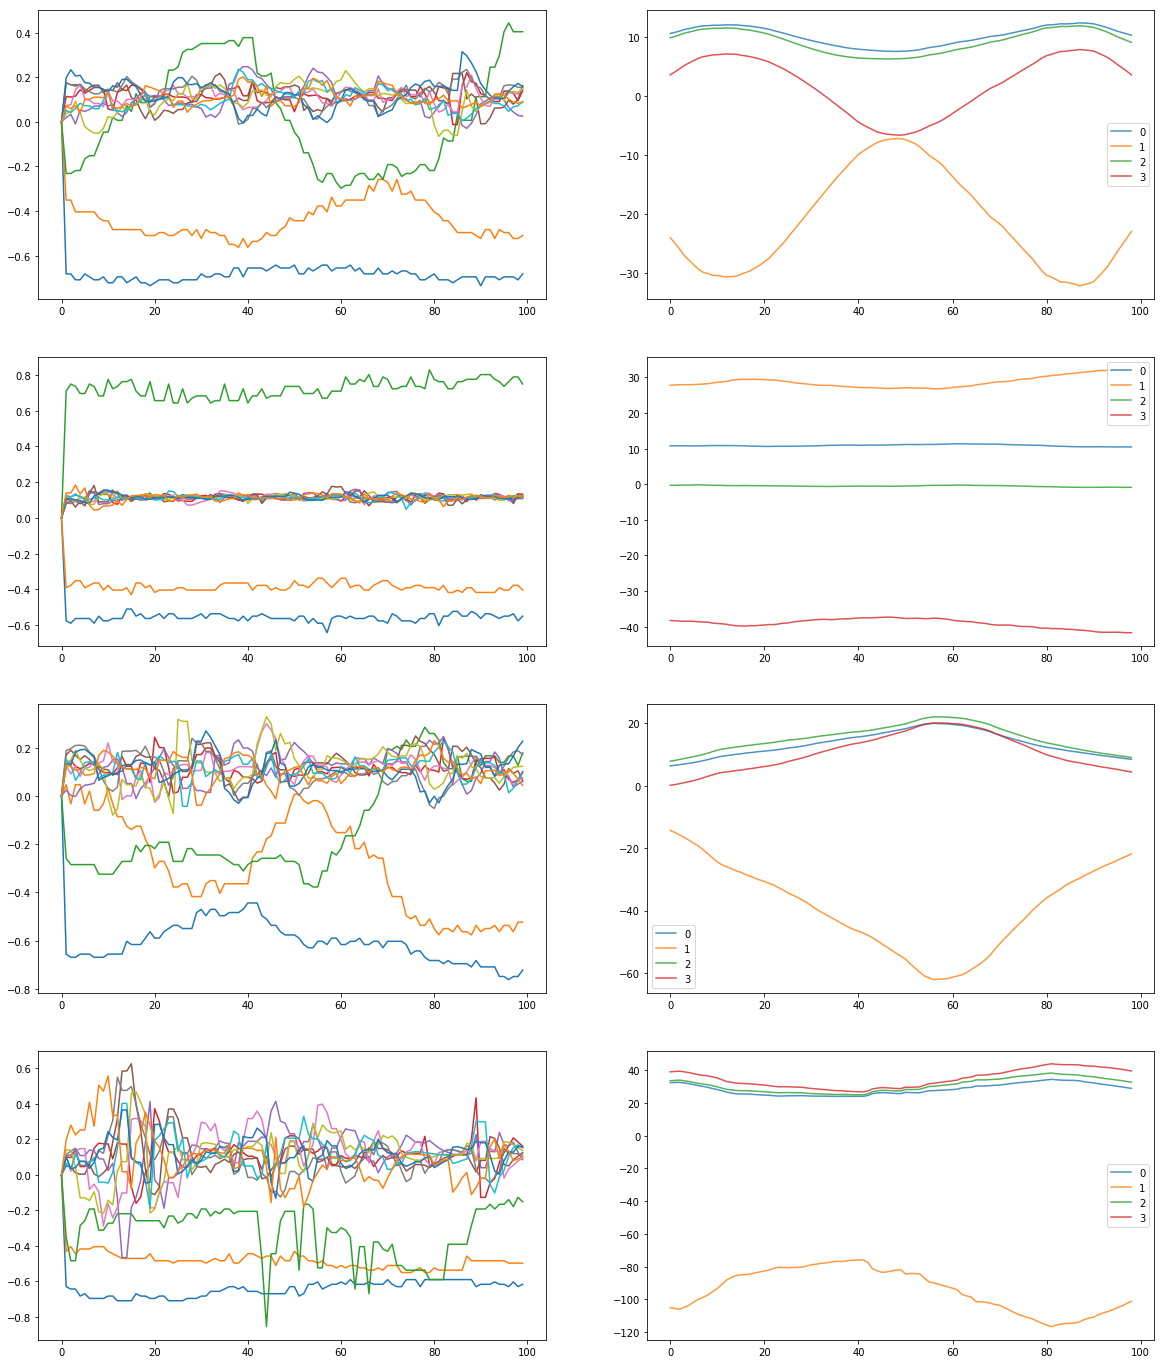

In [131]:
figsize(20,50)
plotConceptorPatterns(net, patternCs, 100)
#for each row, the highest line should match the row index
None

In [132]:
#runtime

def generateClassificationConceptors(net, cNet):
    #calc negative evidence
    def conceptorOr(C,B):
        I = np.eye(C.shape[0])
        return linalg.inv(I + linalg.inv(C.dot(linalg.inv(1.0-C)) + B.dot(linalg.inv(1.0-B))))
    patternCsNeg = np.zeros(len(apertures), dtype=np.object)

    for i_c in arange(net['p']['patts'].size):
        idxs = np.delete(arange(net['p']['patts'].size), i_c)
        Cneg = conceptorOr(patternCs[idxs[0]][0,0], patternCs[idxs[1]][0,0])
        for i_idx in idxs[2:]:
            Cneg = conceptorOr(Cneg, patternCs[i_idx][0,0])
        Cneg = 1.0 - Cneg
        patternCsNeg[i_c] = Cneg

    CNone = conceptorOr(patternCs[0][0,0], patternCs[1][0,0])
    for i_idx in arange(net['p']['patts'].size)[2:]:
        CNone = conceptorOr(CNone, patternCs[i_idx][0,0])
    CNone = 1.0 - CNone
    
    return {'negatives':patternCsNeg, 'none':CNone}

def iterate(net, Cs, classifierCs, u):
    result = np.zeros(net['p']['patts'].size+1)
    net['xOld'] = net['x']
    Wtarget = (net['Wstar'].dot(net['x'])) + vstack((net['Win'].dot(u)))
#     print( Wtarget.shape )
    net['x'] = ((1.0-net['p']['LR']) * net['xOld']) + (net['p']['LR'] * tanh(Wtarget + net['Wbias']))
    for i_ev in range(net['p']['patts'].size):
        C = Cs[i_ev][0,0]
        C2 = classifierCs['negatives'][i_ev]
        cx = net['x'].T.dot(C.dot(net['x']))
        cx2 = net['x'].T.dot(C2.dot(net['x']))
        result[i_ev] = cx + cx2
#         result[i_ev] = cx
    cxNone = net['x'].T.dot(classifierCs['none'].dot(net['x']))
#     net['xGest1'] = Cs[0][0,0].dot(net['x'])
    result[-1] = cxNone
    return result

    
    
net['x'] = np.zeros((net['p']['N'],1))
classifierConceptors = generateClassificationConceptors(net, patternCs)


In [134]:
## load the functions for receiving and sending osc
%run ../python/oscserver.py


# inputValues = [ 0, 0, 0, 0, 0, 0 ]

def onAccelero(args):
    global inputValues
#     print( args )
    inputValues = args
    output = iterate(net, patternCs, classifierConceptors, inputValues)
    oscserver.send_array( "/output", output )
#     print( net['x'].flatten().tolist() )
#     oscserver.send_to_bus( 100, net['x'].flatten().tolist() )
    return True

def onExit():
    print( "exiting" )
    global keepRunning
    keepRunning = False
    oscserver.free()
    return True

oscserver = makeOSCServer(57121, 57403, onExit)
oscserver.onAccelero = onAccelero

oscserver.start()

server created
exit
exiting


In [ ]:
imshow(net['allTrainxArgs'])

In [ ]:
# import time

# keepRunning = True

# # create an initial state for the net
# #state = createState(net)

# while keepRunning:
#     print( inputValues )
#     output = iterate(net, patternCs, classifierConceptors, inputValues)
#     oscserver.send_array( "/output", output )
# #     oscserver.send_array( "/inputvalues", inputValues )
#     time.sleep(0.05)

In [ ]:
print( classifierConceptors )

In [ ]:
testOutput = np.zeros((4,1000))
for i in range(testOutput.shape[1]):
    testOutput[:,i] = iterate(net, patternCs, classifierConceptors, net['p']['patts'][1].take(i, mode='wrap', axis=0))


In [ ]:
figsize(20,5)
plot(testOutput.T)

In [ ]:
figsize(20,5)
plot(testOutput.T)

In [ ]:
figsize(20,5)
plot(testOutput.T)